In [73]:
 # Importing relevant libraries
import torch 
import torch.nn as nn 

import torch.optim as optim
from torch.distributions.uniform import Uniform 
from torch.utils.data import TensorDataset, DataLoader 

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

What are Corpus, Tokens, and Engrams?
A Corpus is defined as a collection of text documents for example a Twitter data set containing the tweets. Twitter data is a corpus. So corpus consists of documents, documents comprise paragraphs, paragraphs comprise sentences and sentences comprise further smaller units which are called Tokens.
Tokens can be words, phrases, or Engrams, and Engrams are defined as the group of n words together.
Refer this link <https://www.analyticsvidhya.com/blog/2021/02/basics-of-natural-language-processing-nlp-basics/> for more details.

Structure of a token :  prefix + morphene + suffix

#### Text Preprocessing

1. Noise Removal - It involves removing stop words (is, am, the), social media entities (mentions, hashtags), punctuations.
                    In the process tweet function, we can see it where using regex we are removing them. For stopwords, we are using nltk library.

2. Normalization -  a. Stemming: Simply removing suffixes from a word (Not recommended because it may give words which are not in vocabulary)
                    b. Lemmatization: Lemmatization, on the other hand, is an organized & step by step procedure of obtaining the root form of the word, it makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations).

3. Object Standardization - It involves handling slangs, lingos or non-standard words with words from vocabulary 

#### Trade off between Stemming and Lemmatization:
The choice depends on the specific use case. Lemmatization produces a linguistically valid word while stemming is faster but may generate non-words.

In [11]:
# Noise Removal 

import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

# With Stemming
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # Lowercase the words
    tweet = tweet.lower()
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [52]:
# Download it if you have not download the wordnet
#import nltk
#nltk.download('wordnet')
#nltk.download('punkt')  # Tokenizers for sentences and words
#nltk.download('averaged_perceptron_tagger')  # POS tagger

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MOHAMMED USAMA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [12]:
# Normalization
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()

word = "multiplying"

# Apply stemming
print("Stemmed:", stem.stem(word))

# Apply lemmatization, specifying that the word is a verb
print("Lemmatized as verb:", lem.lemmatize(word, 'v'))

Stemmed: multipli
Lemmatized as verb: multiply


In [13]:
# With Lemmatization
def process_tweet_Lem(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    lem = WordNetLemmatizer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # Lowercase the words
    tweet = tweet.lower()
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            lemm_text = lem.lemmatize(word)  # Lemmatizing word
            tweets_clean.append(lemm_text)

    return tweets_clean

In [10]:
text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet 
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed 
liquid-fuel launch vehicle to orbit the Earth."""

In [14]:
# Preprocessing and Stemming
process_tweet(text)

['found',
 '2002',
 'spacex',
 '’',
 'mission',
 'enabl',
 'human',
 'becom',
 'spacefar',
 'civil',
 'multi-planet',
 'speci',
 'build',
 'self-sustain',
 'citi',
 'mar',
 '2008',
 'spacex',
 '’',
 'falcon',
 '1',
 'becam',
 'first',
 'privat',
 'develop',
 'liquid-fuel',
 'launch',
 'vehicl',
 'orbit',
 'earth']

In [15]:
# Preprocessing and Lemmatizing
process_tweet_Lem(text)

['founded',
 '2002',
 'spacex',
 '’',
 'mission',
 'enable',
 'human',
 'become',
 'spacefaring',
 'civilization',
 'multi-planet',
 'specie',
 'building',
 'self-sustaining',
 'city',
 'mar',
 '2008',
 'spacex',
 '’',
 'falcon',
 '1',
 'became',
 'first',
 'privately',
 'developed',
 'liquid-fuel',
 'launch',
 'vehicle',
 'orbit',
 'earth']

### Tokenization using different librarires

In [54]:
# nltk
# Before running using this code
#nltk.download('punkt') 

# word tokenize
from nltk import word_tokenize, pos_tag 
text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth."""

tokens = word_tokenize(text)
print(tokens)
# This is part of speech tagging
print(pos_tag(tokens))

from nltk.tokenize import sent_tokenize
sent_tokenize(text)

['Founded', 'in', '2002', ',', 'SpaceX', '’', 's', 'mission', 'is', 'to', 'enable', 'humans', 'to', 'become', 'a', 'spacefaring', 'civilization', 'and', 'a', 'multi-planet', 'species', 'by', 'building', 'a', 'self-sustaining', 'city', 'on', 'Mars', '.', 'In', '2008', ',', 'SpaceX', '’', 's', 'Falcon', '1', 'became', 'the', 'first', 'privately', 'developed', 'liquid-fuel', 'launch', 'vehicle', 'to', 'orbit', 'the', 'Earth', '.']
[('Founded', 'VBN'), ('in', 'IN'), ('2002', 'CD'), (',', ','), ('SpaceX', 'NNP'), ('’', 'NNP'), ('s', 'JJ'), ('mission', 'NN'), ('is', 'VBZ'), ('to', 'TO'), ('enable', 'VB'), ('humans', 'NNS'), ('to', 'TO'), ('become', 'VB'), ('a', 'DT'), ('spacefaring', 'JJ'), ('civilization', 'NN'), ('and', 'CC'), ('a', 'DT'), ('multi-planet', 'JJ'), ('species', 'NNS'), ('by', 'IN'), ('building', 'VBG'), ('a', 'DT'), ('self-sustaining', 'JJ'), ('city', 'NN'), ('on', 'IN'), ('Mars', 'NNP'), ('.', '.'), ('In', 'IN'), ('2008', 'CD'), (',', ','), ('SpaceX', 'NNP'), ('’', 'NNP'), (

['Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet species by building a self-sustaining city on Mars.',
 'In 2008, SpaceX’s Falcon 1 became the first privately developed liquid-fuel launch vehicle to orbit the Earth.']

In [33]:
# Using keras

# Word Tokenization
from keras.preprocessing.text import text_to_word_sequence
# define
text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet 
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed 
liquid-fuel launch vehicle to orbit the Earth."""
# tokenize
result = text_to_word_sequence(text)
result

['founded',
 'in',
 '2002',
 'spacex’s',
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi',
 'planet',
 'species',
 'by',
 'building',
 'a',
 'self',
 'sustaining',
 'city',
 'on',
 'mars',
 'in',
 '2008',
 'spacex’s',
 'falcon',
 '1',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 'liquid',
 'fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'earth']

In [38]:
# Using gensim
#!pip install gensim==3.8.3

# word tokenization
from gensim.utils import tokenize
text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet 
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed 
liquid-fuel launch vehicle to orbit the Earth."""
list(tokenize(text))

['Founded',
 'in',
 'SpaceX',
 's',
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'multi',
 'planet',
 'species',
 'by',
 'building',
 'a',
 'self',
 'sustaining',
 'city',
 'on',
 'Mars',
 'In',
 'SpaceX',
 's',
 'Falcon',
 'became',
 'the',
 'first',
 'privately',
 'developed',
 'liquid',
 'fuel',
 'launch',
 'vehicle',
 'to',
 'orbit',
 'the',
 'Earth']

#### Basic Regex Code required for NLP

In [40]:
# To find a URL in a sentence
def find_url(string):
    text = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',string)
    #convert return value from list to string    
    return "".join(text)

example="I love spending time at https://www.leetcode.com/"
find_url(example)

'https://www.leetcode.com/'

In [45]:
#!pip install emoji 
import emoji

# To find emoticons in a sentence
def findEmoji(text):
    emo_text=emoji.demojize(text)
    line=re.findall(r':(.*?):',emo_text)
    return line

example="I love ⚽ very much 😁"
findEmoji(example)

['soccer_ball', 'beaming_face_with_smiling_eyes']

In [48]:
# To find an email

def findEmail(text):
    # Improved regex pattern for matching email addresses
    line = re.findall(r'[\w\.-]+@[\w\.-]+\.\w+', str(text))
    return ",".join(line)

# Example usage
example = "Gaurav's gmail is gsgs111@gmail.com"
print(findEmail(example))


gsgs111@gmail.com


After tokenization, it should be noted that ML models cannot process words or string, so we need to convert them in numbers or embeddings

Common methods are:
1. **Frequency based Embedding:**
2. **Prediction based Embedding**

**Frequency based Embedding:**
1. **Count based Embedding:**
    Let us understand this using a simple example.

    D1: He is a lazy boy. She is also lazy.

    D2: Neeraj is a lazy person.

    The dictionary created may be a list of unique tokens(words) in the corpus =[‘He’,’She’,’lazy’,’boy’,’Neeraj’,’person’]

    Here, D=2, N=6

    The count matrix M of size 2 X 6 will be represented as –

|     | He | She | lazy | boy | Neeraj | person |
|-----|----|-----|------|-----|--------|--------|
| D1  |  1 |   1 |    2 |   1 |      0 |      0 |
| D2  |  0 |   0 |    1 |   0 |      1 |      1 |


2. **TF-IDF Vectorization**

    When considering frequency there might be issues with words like is, are, or others words which might be repaeated again and have high frequency but will not make sense. At the same, some words will high freqency in a documents but not in other sentences in the corpus so we need to identify these and penalised words are not useful.

    Now, let us define a few terms related to TF-IDF.

    TF = (Number of times term t appears in a document)/(Number of terms in the document)

    So, TF(This,Document1) = 1/8

    TF(This, Document2)=1/5

    IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in

    for example a word has appeared the docs in the corpus (assuming 2 docs)

    IDF(This) = log(2/2) = 0

    If it has appeared in only 1
    IDF(Other) = log(2/1) = 0.301.


    TF-IDF = TF * IDF
    TF-IDF(This, Document1) = 1/8 * 0 = 0
    TF-IDF(This, Document2) = 1/5 * 0 = 0

    In this way, it penalizes and unnecessary word which is frequent.


**Prediction based Embedding**

This makes use of neural networks to get embeddings. It has two methods 
1. CBOW
2. Skip Gram

In [56]:
# Using Gensim for Word2Vec

from gensim.models import Word2Vec

import numpy as np

sentences = [['drink','not','good'],
			['felt','superb'],
			['just','good','ambience'],
			['bad','taste'],
			['parking','problem'],
            ['fantastic','food']]
y = np.array([0,1,1,0,0,1])

In [58]:
model = Word2Vec(sentences, vector_size=100, min_count=1, window=3, sg=1)

In [59]:
print(model)

Word2Vec<vocab=13, vector_size=100, alpha=0.025>


In [61]:
# Accessing vocabulary words
words = list(model.wv.key_to_index.keys())  # Gets all words in the vocabulary
print(words)

['good', 'food', 'fantastic', 'problem', 'parking', 'taste', 'bad', 'ambience', 'just', 'superb', 'felt', 'not', 'drink']


In [63]:
model.wv['good']

array([-5.3622725e-04,  2.3643136e-04,  5.1033497e-03,  9.0092728e-03,
       -9.3029495e-03, -7.1168090e-03,  6.4588725e-03,  8.9729885e-03,
       -5.0154282e-03, -3.7633716e-03,  7.3805046e-03, -1.5334714e-03,
       -4.5366134e-03,  6.5540518e-03, -4.8601604e-03, -1.8160177e-03,
        2.8765798e-03,  9.9187379e-04, -8.2852151e-03, -9.4488179e-03,
        7.3117660e-03,  5.0702621e-03,  6.7576934e-03,  7.6286553e-04,
        6.3508903e-03, -3.4053659e-03, -9.4640139e-04,  5.7685734e-03,
       -7.5216377e-03, -3.9361035e-03, -7.5115822e-03, -9.3004224e-04,
        9.5381187e-03, -7.3191668e-03, -2.3337686e-03, -1.9377411e-03,
        8.0774371e-03, -5.9308959e-03,  4.5162440e-05, -4.7537340e-03,
       -9.6035507e-03,  5.0072931e-03, -8.7595852e-03, -4.3918253e-03,
       -3.5099984e-05, -2.9618145e-04, -7.6612402e-03,  9.6147433e-03,
        4.9820580e-03,  9.2331432e-03, -8.1579173e-03,  4.4957981e-03,
       -4.1370760e-03,  8.2453608e-04,  8.4986202e-03, -4.4621765e-03,
      

In [64]:
sentences

[['drink', 'not', 'good'],
 ['felt', 'superb'],
 ['just', 'good', 'ambience'],
 ['bad', 'taste'],
 ['parking', 'problem'],
 ['fantastic', 'food']]

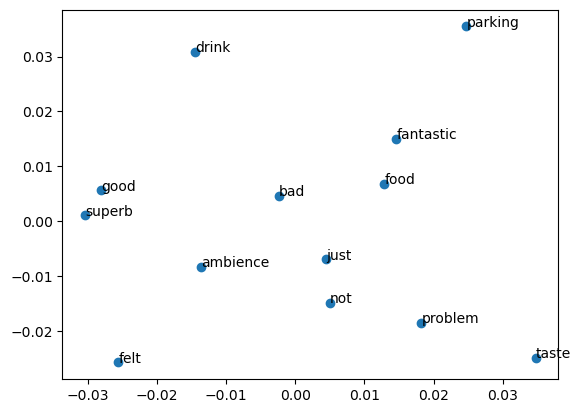

In [74]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# Prepare data for PCA
X = model.wv[model.wv.index_to_key]  # Get all word vectors into a list
pca = PCA(n_components=2)
result = pca.fit_transform(X)  # Fit and transform the word vectors to 2D

# Plotting
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)  # List of all words in the vocabulary
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

The next part is **Syntactic analysis**:  
Syntactic analysis is defined as analysis that tells us the logical meaning of certainly given sentences or parts of those sentences.

Difference between Lexical and Syntactic analysis:  
The aim of lexical analysis is in Data Cleaning and Feature Extraction with the help of techniques such as

- Stemming,
- Lemmatization,
- Correcting misspelled words, etc.


But on the contrary, in syntactic analysis, our target is to :

- Find the roles played by words in a sentence,
- Interpret the relationship between words,
- Interpret the grammatical structure of sentences.

In [79]:
import spacy
#!python -m spacy download en_core_web_sm


# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Define the text to be processed
text = 'It took me more than two hours to translate a few pages of English.'

# Process the text with the spaCy model
doc = nlp(text)

# Iterate through each token in the processed document
for token in doc:
    # Print the text of the token, its coarse-grained part of speech (POS), and its fine-grained tag
    print(token.text, '=>', token.pos_, '=>', token.tag_)

It => PRON => PRP
took => VERB => VBD
me => PRON => PRP
more => ADJ => JJR
than => ADP => IN
two => NUM => CD
hours => NOUN => NNS
to => PART => TO
translate => VERB => VB
a => DET => DT
few => ADJ => JJ
pages => NOUN => NNS
of => ADP => IN
English => PROPN => NNP
. => PUNCT => .


### Dependency parsing
In Dependency parsing, various tags represent the relationship between two words in a sentence. These tags are the dependency tags. For example, In the phrase ‘rainy weather,’ the word rainy modifies the meaning of the noun weather. Therefore, a dependency exists from the weather -> rainy in which the weather acts as the head and the rainy acts as dependent or child. This dependency is represented by amod tag, which stands for the adjectival modifier.

In the below code example, the dep_ returns the dependency tag for a word, and head.text returns the respective head word. If you noticed, in the above image, the word took has a dependency tag of ROOT. This tag is assigned to the word which acts as the head of many words in a sentence but is not a child of any other word. Generally, it is the main verb of the sentence similar to ‘took’ in this case.

In [81]:
import spacy
nlp=spacy.load('en_core_web_sm')

text='It took me more than two hours to translate a few pages of English.'

for token in nlp(text):
    print(token.text,'=>',token.dep_,'=>',token.head.text)

It => nsubj => took
took => ROOT => took
me => dobj => took
more => amod => two
than => quantmod => two
two => nummod => hours
hours => dobj => took
to => aux => translate
translate => xcomp => took
a => det => pages
few => amod => pages
pages => dobj => translate
of => prep => pages
English => pobj => of
. => punct => took


In [82]:
# Visualizing the dependency
from spacy import displacy
displacy.render(nlp(text),jupyter=True)

### [Language Models](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-language-model-nlp-python-code/?utm_source=reading_list)
Types of Language Models  
There are primarily two types of Language Models:
- Statistical Language Models
- Neural Language Models

#### Statistical Language Models

In [83]:
### Building a basic Language Model

# code courtesy of https://nlpforhackers.io/language-models/

from nltk.corpus import reuters
from nltk import bigrams, trigrams
from collections import Counter, defaultdict
import nltk
nltk.download('reuters')
nltk.download('punkt')

# Create a placeholder for model
model = defaultdict(lambda: defaultdict(lambda: 0))

[nltk_data] Downloading package reuters to C:\Users\MOHAMMED
[nltk_data]     USAMA\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to C:\Users\MOHAMMED
[nltk_data]     USAMA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [85]:
# Count frequency of co-occurance  
for sentence in reuters.sents():
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
        model[(w1, w2)][w3] += 1


In [88]:
# Let's transform the counts to probabilities
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count

In [90]:
print(dict(model['today', 'the']))

{'public': 0.05555555555555555, 'European': 0.05555555555555555, 'Bank': 0.05555555555555555, 'price': 0.1111111111111111, 'emirate': 0.05555555555555555, 'overseas': 0.05555555555555555, 'newspaper': 0.05555555555555555, 'company': 0.16666666666666666, 'Turkish': 0.05555555555555555, 'increase': 0.05555555555555555, 'options': 0.05555555555555555, 'Higher': 0.05555555555555555, 'pound': 0.05555555555555555, 'Italian': 0.05555555555555555, 'time': 0.05555555555555555}


In [96]:
# So we get predictions of all the possible words that can come next with their respective probabilities. 
# If we keep following this process iteratively, we will soon have a coherent sentence!

import random

# starting words
text = ["today", "the"]
sentence_finished = False
 
while not sentence_finished:
  # select a random probability threshold  
  r = random.random()
  accumulator = .0

  for word in model[tuple(text[-2:])].keys():
      accumulator += model[tuple(text[-2:])][word]
      # select words that are above the probability threshold
      if accumulator >= r:
          text.append(word)
          break

  if text[-2:] == [None, None]:
      sentence_finished = True
 
print (' '.join([t for t in text if t]))


# The sentence may not make sense in some parts but it still works well.

today the increase in value , certificate holders would receive 52 dlrs vs 2 . 60 yen after Bank of Italy ' s 503 mln ( U . S . OIL DEMAND UP 2 . 3 Ecus below what producers claim is needed .


#### Neural Language Models